# DATA PREPROCESSING

In this notebook, I will explore the raw data. I'll look at NA values first and then do some analysis regarding variable distributions and summary statistics. 


## TABLE OF CONTENTS

1. [Load Data](#load-data)
2. [Basic Exploration](#basic-exploration)
    - [Drop Redundant Columns](#drop-redundant-columns)
    - [Handling NA Values](#handling-na-values)

## LOAD DATA

In [130]:
import pandas as pd
import numpy as np
import duckdb
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go

In [2]:
raw_data = pd.read_parquet("../data/processed/delays_PHL_coord_weather_data.parquet")

In [4]:
raw_data.head()

,FlightDate,DOT_ID_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,Origin,DestAirportID,Dest,CRSDepTime,DepTime,...,dest_wind_speed_10m_max,dest_wind_gusts_10m_max,dest_wind_direction_10m_dominant,dest_shortwave_radiation_sum,dest_et0_fao_evapotranspiration,dest_precipitation_sum,dest_rain_sum,dest_snowfall_sum,dest_precipitation_hours,dest_weather_code
0,2020-01-01,20409,N655JB,976,11697,FLL,14100,PHL,2152,2143.0,...,8.0,28.8,338,10.44,0.69,0.0,0.0,0.00,0.0,3
1,2020-01-02,20409,N591JB,976,11697,FLL,14100,PHL,2152,2152.0,...,7.9,26.3,326,9.66,0.64,0.0,0.0,0.00,0.0,3
2,2020-01-03,20409,N657JB,976,11697,FLL,14100,PHL,2152,2150.0,...,7.1,35.3,332,8.78,0.65,0.0,0.0,0.00,0.0,3
3,2020-01-04,20409,N709JB,976,11697,FLL,14100,PHL,2152,2215.0,...,9.1,40.7,354,7.64,0.54,0.0,0.0,0.00,0.0,3
4,2020-01-05,20409,N627JB,976,11697,FLL,14100,PHL,2152,2149.0,...,8.8,25.9,13,10.25,0.54,0.2,0.0,0.14,2.0,71


## BASIC EXPLORATION

We have 488,392 rows and 68 columns. In this data, one row corresponds to a flight that occured on a particular day between an origin and destination airport.

In [5]:
raw_data.shape

(488392, 68)

In [53]:
raw_data.describe()

,FlightDate,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,DestAirportID,CRSDepTime,DepTime,DepDelay,TaxiOut,WheelsOff,...,dest_wind_speed_10m_max,dest_wind_gusts_10m_max,dest_wind_direction_10m_dominant,dest_shortwave_radiation_sum,dest_et0_fao_evapotranspiration,dest_precipitation_sum,dest_rain_sum,dest_snowfall_sum,dest_precipitation_hours,dest_weather_code
count,488392,488392.000000,488392.000000,488392.000000,488392.0,488392.000000,476427.000000,476427.000000,476198.000000,476198.000000,...,488392.000000,488392.000000,488392.000000,488392.000000,488392.000000,488392.000000,488392.000000,488392.000000,488392.000000,488392.000000
mean,2022-12-18 09:04:10.677323776,20065.295390,2673.708894,12619.935425,14100.0,1292.753884,1291.758269,13.075508,17.261234,1308.584238,...,9.805920,40.522073,266.005053,18.894176,2.321413,1.520064,0.733691,0.551880,3.642040,36.441948
min,2020-01-01 00:00:00,19393.000000,6.000000,10154.000000,14100.0,1.000000,1.000000,-56.000000,1.000000,1.000000,...,3.900000,15.800000,0.000000,4.990000,0.210000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-08-27 00:00:00,19805.000000,1300.000000,11066.000000,14100.0,830.000000,832.000000,-7.000000,12.000000,844.000000,...,8.300000,30.200000,174.000000,12.690000,1.020000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,2023-01-11 00:00:00,19805.000000,2301.000000,12892.000000,14100.0,1255.000000,1254.000000,-3.000000,15.000000,1305.000000,...,9.500000,38.200000,333.000000,19.000000,2.080000,0.100000,0.000000,0.000000,1.000000,51.000000
75%,2024-05-20 00:00:00,20416.000000,4508.000000,13931.000000,14100.0,1700.000000,1709.000000,7.000000,19.000000,1721.000000,...,11.000000,47.900000,345.000000,24.580000,3.500000,1.600000,0.400000,0.210000,6.000000,71.000000
max,2025-07-31 00:00:00,20452.000000,8815.000000,15919.000000,14100.0,2359.000000,2400.000000,3403.000000,179.000000,2400.000000,...,25.200000,95.400000,360.000000,34.110000,5.890000,38.500000,20.100000,25.340000,24.000000,75.000000
std,NaN,335.343967,1715.869855,1561.446414,0.0,503.500309,519.530389,67.863894,8.774088,521.880676,...,2.275373,13.563238,110.529946,6.769281,1.372680,3.261084,1.849672,1.829776,5.229313,31.908800


In [57]:
raw_data.describe(include = "O")

,Tail_Number,Origin,Dest,CancellationCode,origin_code,origin_name,origin_time,origin_lat_long
count,484298,488392,488392,12211,488392,488392,488392,488392
unique,5419,110,1,4,110,110,2039,110
top,N424YX,MCO,PHL,B,MCO,Orlando International Airport,2024-08-23,"(28.413, -81.309)"
freq,692,30087,488392,5218,30087,30087,355,30087


### Drop redundant columns

Before we start analyzing the data, there are some redundant columns left over from the joins we did in previous notebooks. In this sections, we'll look at all the columns in the data, find redundant columns, and drop them.

In [59]:
raw_data.head(1)

,FlightDate,DOT_ID_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,Origin,DestAirportID,Dest,CRSDepTime,DepTime,...,dest_wind_speed_10m_max,dest_wind_gusts_10m_max,dest_wind_direction_10m_dominant,dest_shortwave_radiation_sum,dest_et0_fao_evapotranspiration,dest_precipitation_sum,dest_rain_sum,dest_snowfall_sum,dest_precipitation_hours,dest_weather_code
0,2020-01-01,20409,N655JB,976,11697,FLL,14100,PHL,2152,2143.0,...,8.0,28.8,338,10.44,0.69,0.0,0.0,0.0,0.0,3


In [58]:
raw_data.columns

Index(['FlightDate', 'DOT_ID_Reporting_Airline', 'Tail_Number',
       'Flight_Number_Reporting_Airline', 'OriginAirportID', 'Origin',
       'DestAirportID', 'Dest', 'CRSDepTime', 'DepTime', 'DepDelay', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay',
       'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Distance', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'origin_code', 'origin_name', 'origin_latitude', 'origin_longitude',
       'origin_time', 'origin_temperature_2m_mean',
       'origin_temperature_2m_max', 'origin_temperature_2m_min',
       'origin_apparent_temperature_mean', 'origin_apparent_temperature_max',
       'origin_apparent_temperature_min', 'origin_wind_speed_10m_max',
       'origin_wind_gusts_10m_max', 'origin_wind_direction_10m_dominant',
       'origin_shortwave_radiation_sum', 'origin_et0_fao_evapotranspiration',
       'origi

From the list above and the preview of our data, we can see several columns that are basically duplicates of each other.

- `origin_code` is a duplicate of `Origin` that is left over from our join with the airport location data.
- `origin_time` is a duplicate of `FlightDate` that is left over from our join with the origin airport weather data.
- `dest_time` is a duplicate of `FlightDate` that is left over from our join with the destination airport weather data.
- `origin_lat_long` is not a direct duplicate but is an artifact of our join with the origin airport weather data. We already have explicit `origin_latitude` and `origin_longitude` columns and `origin_lat_long` being a column of tuples means it is just adding unnecessary complexity.

Before we do any analysis, let's drop these columns to make our data more readable and avoid redundancy.

In [60]:
raw_data = raw_data.drop(columns = ["origin_code", "origin_time", "dest_time", "origin_lat_long", "origin_longitude"])

### Handling NA Values

Because we have so many columns, methods like `info` are hard to interpret. Let's start by looking at NA values by column. To do this, we'll construct a new table that summarizes the NA composition of each column. If our data generating process was executed properly, we should only have NA values for columns relating to the original BTS data. From the table below we see that `CancellationCode`, `SecurityDelay`, `LateAircraftDelay`, `NASDelay`, `WeatherDelay`, and `CarrierDelay` are majority NA. All other columns with more than 0 NAs have under 5% NA values, meaning we can likely drop of easily process those rows without significantly reducing our training data.

However, we'll need to first look at and then decide how to deal with the majority NA columns.

In [61]:
# Create function to auto create NA df
def create_NA_summary_df(df:pd.DataFrame) -> pd.DataFrame:
    """Function to count NAs per column, calculat % of column 
    that is made up of NAs and display information in a 
    DataFrame with column, data type, NA values, and % NA
    """
    cols = [col for col in df.columns]
    dtype = [str(df[col].dtype) for col in cols]
    nas = [df[col].isna().sum() for col in cols]
    pct_nas = [na/df.shape[0] for na in nas]

    nas_dict = {
        "Column": cols,
        "Data Type": dtype,
        "Number of NA Values": nas,
        "Percent NA": pct_nas
    }

    na_summary_df = pd.DataFrame(nas_dict)
    return na_summary_df.sort_values(by = "Percent NA", ascending = False)

In [62]:
# Create na overview
na_summary_df = create_NA_summary_df(raw_data)
na_summary_df

,Column,Data Type,Number of NA Values,Percent NA
18,CancellationCode,object,476181,0.974998
25,WeatherDelay,float64,394357,0.807460
26,NASDelay,float64,394357,0.807460
24,CarrierDelay,float64,394357,0.807460
27,SecurityDelay,float64,394357,0.807460
...,...,...,...,...
34,origin_apparent_temperature_mean,float64,0,0.000000
35,origin_apparent_temperature_max,float64,0,0.000000
36,origin_apparent_temperature_min,float64,0,0.000000
37,origin_wind_speed_10m_max,float64,0,0.000000


To properly deal with these columns, we need to first understand what each columns stands for. Below are the column definitions from the official [table description](https://www.transtats.bts.gov/TableInfo.asp?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr&V0s1_b0yB=D):


| Column | Definition |
|--------|------------|
| Cancellation Code | Code specifying the reason for cancellation |
| SecurityDelay | Security delay, **in minutes** | 
| LateAircraftDelay | Late aircraft delay, **in minutes** | 
| NASDelay | National Air System Delay, **in minutes** | 
| WeatherDealy | Weather delay, **in minutes** |
| CarrierDelay | Carrier delay, **in minutes** | 


After confirming the column definitions, we can see that these columns would likely cause **data leakage** if included in our model. Of course, at the time of prediction, Philadelphia International Airport would not know how many minutes of delay were caused by security, late aircrafts, etc. However, these columns could be useful in better understanding delays across the US and what driving factors may be behind delays. We should still process these columns to be usable so we can visualize and aggregate around them. In this case, a suitable replacement for an NA value could be 0, since NAs seem to represent cases where there was **no delay** caused due to that specific reason. The `CancellationCode` column also highlights another important quirk of our data. Our data does not only include completed flights. It includes completed, diverted, and cancelled flights. For the purposes of our analysis, we are only concerned with **completed** flights to examine whether or not they were delayed. If they were cancelled, we cannot gather any useful information for our analysis and diversions likely require their own analysis as they are usually caused by exogenous circumstances.

In [63]:
raw_data[["CancellationCode", "SecurityDelay", "LateAircraftDelay", "NASDelay", "WeatherDelay", "CarrierDelay"]]

,CancellationCode,SecurityDelay,LateAircraftDelay,NASDelay,WeatherDelay,CarrierDelay
0,None,NaN,NaN,NaN,NaN,NaN
1,None,NaN,NaN,NaN,NaN,NaN
2,None,NaN,NaN,NaN,NaN,NaN
3,None,NaN,NaN,NaN,NaN,NaN
4,None,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
488387,None,NaN,NaN,NaN,NaN,NaN
488388,None,NaN,NaN,NaN,NaN,NaN
488389,None,0.0,0.0,60.0,0.0,0.0
488390,None,NaN,NaN,NaN,NaN,NaN


First, we'll filter the data to only include **completed** flights.

In [64]:
# Check how cancelled and diverted columns present
df = raw_data.copy()
display(df["Diverted"].value_counts())
display(df["Cancelled"].value_counts())

Diverted
0.0    487585
1.0       807
Name: count, dtype: int64

Cancelled
0.0    476181
1.0     12211
Name: count, dtype: int64

In [65]:
# Filter for flights that aren't cancelled or diverted 
completed_flights_df = df[(df["Cancelled"] == 0.0) & (df["Diverted"] == 0.0)].copy()

# Now that we only have completed flights, we don't need CancellationCode, Cancelled, or Diverted columns
completed_flights_df = completed_flights_df.drop(columns = ["CancellationCode", "Cancelled", "Diverted"])

print(f"After removing cancellations and diversions, we are left with {round(completed_flights_df.shape[0] / df.shape[0], 2) * 100}% of our data.")

After removing cancellations and diversions, we are left with 97.0% of our data.


In [66]:
# Fill NA values for delay cause columns to 0
cols_to_fill = ["SecurityDelay", "LateAircraftDelay", "NASDelay", "WeatherDelay", "CarrierDelay"]
completed_flights_df[cols_to_fill] = completed_flights_df[cols_to_fill].fillna(0)

Now that we've dealt with the majority NA columns, let's remind ourselves of the other NA columns to look at. We will recalculate the table since several of our NA values could have stemmed from records of diverted or canceled flights.

In [67]:
na_summary_df = create_NA_summary_df(completed_flights_df)
na_summary_df

,Column,Data Type,Number of NA Values,Percent NA
0,FlightDate,datetime64[ns],0,0.0
1,DOT_ID_Reporting_Airline,int64,0,0.0
32,origin_apparent_temperature_max,float64,0,0.0
33,origin_apparent_temperature_min,float64,0,0.0
34,origin_wind_speed_10m_max,float64,0,0.0
35,origin_wind_gusts_10m_max,float64,0,0.0
36,origin_wind_direction_10m_dominant,int64,0,0.0
37,origin_shortwave_radiation_sum,float64,0,0.0
38,origin_et0_fao_evapotranspiration,float64,0,0.0
39,origin_precipitation_sum,float64,0,0.0


Looks like filtering for completed flights took care of the remaining columns with NA values!

## Grouping and Visualizing

In this section, we'll explore aggregate statistics and key variable distributions.

In [68]:
flights_df = completed_flights_df.copy()

In [69]:
flights_df.columns

Index(['FlightDate', 'DOT_ID_Reporting_Airline', 'Tail_Number',
       'Flight_Number_Reporting_Airline', 'OriginAirportID', 'Origin',
       'DestAirportID', 'Dest', 'CRSDepTime', 'DepTime', 'DepDelay', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay',
       'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Distance',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'origin_name', 'origin_latitude',
       'origin_temperature_2m_mean', 'origin_temperature_2m_max',
       'origin_temperature_2m_min', 'origin_apparent_temperature_mean',
       'origin_apparent_temperature_max', 'origin_apparent_temperature_min',
       'origin_wind_speed_10m_max', 'origin_wind_gusts_10m_max',
       'origin_wind_direction_10m_dominant', 'origin_shortwave_radiation_sum',
       'origin_et0_fao_evapotranspiration', 'origin_precipitation_sum',
       'origin_rain_sum', 'origin_snowfall_sum', 'origin_precipitation_hours',
       '

The obvious place to start is by exploring the average delay times by origin airport.

In [132]:
grouped_df = (
    flights_df.groupby(["Origin", "Dest"])
    .agg(
        AverageArrDelay = ("ArrDelay", "mean"),
        MedianArrDelay = ("ArrDelay", "median"),
        AverageDepDelay = ("DepDelay", "mean"),
        MedianDepDelay = ("DepDelay", "mean")
    )
    .reset_index()
)

grouped_df

,Origin,Dest,AverageArrDelay,MedianArrDelay,AverageDepDelay,MedianDepDelay
0,ACK,PHL,4.472678,-8.5,9.855191,9.855191
1,AGS,PHL,30.725490,17.0,34.254902,34.254902
2,ALB,PHL,4.807692,-11.0,9.305430,9.305430
3,ATL,PHL,7.067776,-5.0,12.777116,12.777116
4,AUS,PHL,21.841202,-5.0,26.533262,26.533262
...,...,...,...,...,...,...
105,TPA,PHL,8.547278,-7.0,13.882807,13.882807
106,TVC,PHL,5.911839,-5.0,8.748111,8.748111
107,TYS,PHL,-0.490452,-12.0,4.693992,4.693992
108,VPS,PHL,22.804196,-4.0,24.552448,24.552448


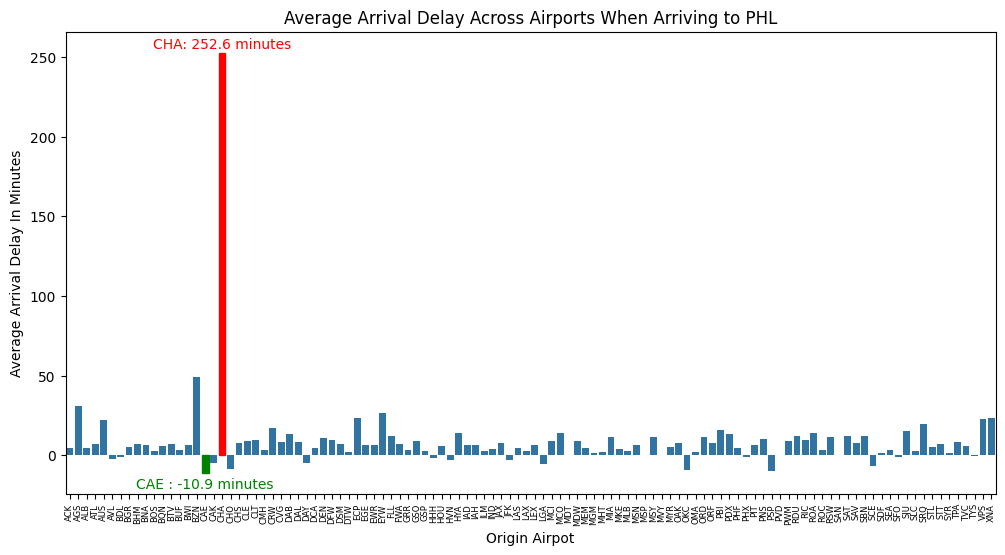

In [129]:
# Graph average delays and highlight best and worst airports
var_to_graph = "AverageArrDelay"
max_airport_to_highlight = grouped_df[grouped_df[var_to_graph] == max(grouped_df[var_to_graph])]["Origin"].item()
min_airport_to_highlight = grouped_df[grouped_df[var_to_graph] == min(grouped_df[var_to_graph])]["Origin"].item()

fig, ax = plt.subplots(figsize = (12,6))

sns.barplot(data = grouped_df, x = "Origin", y = var_to_graph)

for bar, label in zip(ax.patches, grouped_df["Origin"].unique()):
    if label == max_airport_to_highlight:
        bar.set_color("red")
        ax.text(bar.get_x() + bar.get_width() / 2,
                bar.get_height() + 1,
                f"{max_airport_to_highlight}: {bar.get_height():.1f} minutes",
                ha="center", va="bottom", fontsize=10, color="red")
    elif label == min_airport_to_highlight:
        bar.set_color("green")
        ax.text(bar.get_x() + bar.get_width() / 2,
                bar.get_height() - 12,
                f"{min_airport_to_highlight} : {bar.get_height(): .1f} minutes",
                ha = "center", va = "bottom", fontsize = 10, color = "green")

ax.tick_params(axis = "x", labelsize = 6, rotation = 90)

ax.set_xlabel("Origin Airpot")
ax.set_ylabel("Average Arrival Delay In Minutes")
ax.set_title("Average Arrival Delay Across Airports When Arriving to PHL")

plt.show()

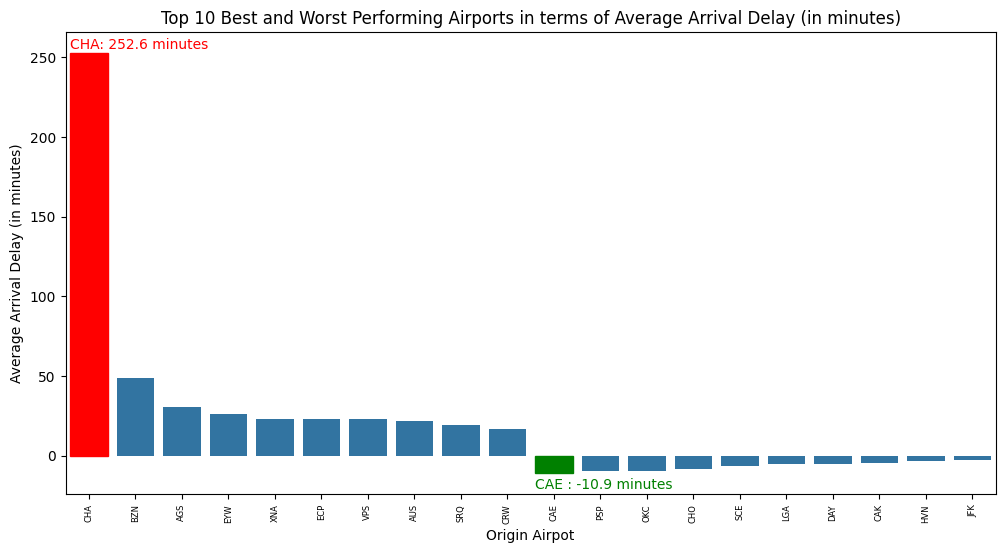

In [ ]:
# Graph best and worst x average delays and highlight best and worst airports
best_worst_x = 10
var_to_graph = "AverageArrDelay"

filtered_grouped_df = pd.concat([grouped_df.nlargest(best_worst_x, var_to_graph), grouped_df.nsmallest(best_worst_x, var_to_graph)])
max_airport_to_highlight = filtered_grouped_df[filtered_grouped_df[var_to_graph] == max(filtered_grouped_df[var_to_graph])]["Origin"].item()
min_airport_to_highlight = filtered_grouped_df[filtered_grouped_df[var_to_graph] == min(filtered_grouped_df[var_to_graph])]["Origin"].item()

axis_label_map = {
    "AverageArrDelay": "Average Arrival Delay (in minutes)",
    "MedianArrDelay": "Median Arrival Delay (in minutes)",
    "AverageDepDelay": "Average Departure Delay (in minutes)",
    "MedianDepDelay": "Median Departure Delay (in minutes)"
}

fig, ax = plt.subplots(figsize = (12,6))

sns.barplot(data = filtered_grouped_df, x = "Origin", y = var_to_graph)

for bar, label in zip(ax.patches, filtered_grouped_df["Origin"].unique()):
    if label == max_airport_to_highlight:
        bar.set_color("red")
        ax.text(bar.get_x(),
                bar.get_height() + 1,
                f"{max_airport_to_highlight}: {bar.get_height():.1f} minutes",
                ha="left", va="bottom", fontsize=10, color="red")
    elif label == min_airport_to_highlight:
        bar.set_color("green")
        ax.text(bar.get_x() ,
                bar.get_height() - 12,
                f"{min_airport_to_highlight} : {bar.get_height(): .1f} minutes",
                ha = "left", va = "bottom", fontsize = 10, color = "green")

ax.tick_params(axis = "x", labelsize = 6, rotation = 90)

ax.set_xlabel("Origin Airpot")
ax.set_ylabel(f"{axis_label_map[var_to_graph]}")
ax.set_title(f"Top 10 Best and Worst Performing Airports in terms of {axis_label_map[var_to_graph]}")

plt.show()